# k-Means Clustering Examples
Notes by Messiah Ataey (github.com/ataey)

In [1]:
# boilerplate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns
%matplotlib inline

C:\Users\Messiah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'Two-dimensional dataset with three classes')

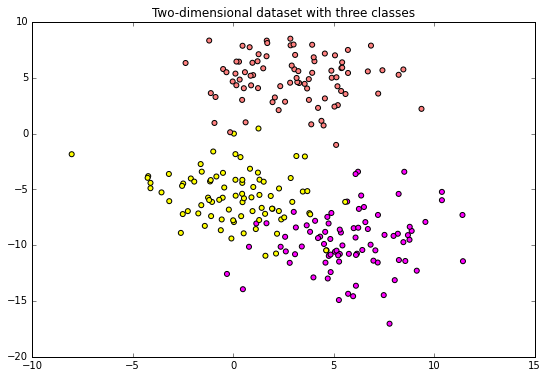

In [2]:
from sklearn.datasets.samples_generator import make_blobs

# sample and plot a two-dimensional dataset with three class labels
X, y = make_blobs(n_samples=250, centers=3, cluster_std=2.5, random_state=10)

fig = plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], s=25, c=y, cmap='spring')
plt.title('Two-dimensional dataset with three classes')

k-Means is an unsupervised clustering algorithm. It searches for the boundaries of a predefined number of clusters within a dataset with no known output. The center of such clusters is essentially the arithmetic mean of all the points belonging to the cluster. Each point is within the vicinity of its own cluster, as opposed to other clusters. These two ideas form the essence of the k-Means model. 

In [3]:
# instantiate and fit a k-Means model with 3 cluster centers on the sample data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X)

# store cluster centers in another variable
centers = kmeans.cluster_centers_

# view the predicted labels
print(kmeans.labels_)

[2 1 2 0 1 0 0 1 1 1 2 2 1 0 1 2 1 0 2 0 2 1 2 2 2 0 2 0 0 2 2 0 0 1 2 1 2
 2 0 1 0 0 0 0 2 0 2 1 1 1 1 0 2 2 2 1 2 1 2 1 2 0 0 1 1 1 2 2 2 1 1 1 0 1
 1 2 0 1 1 0 1 0 2 2 1 2 0 2 0 1 0 0 2 0 1 1 2 1 0 0 0 0 0 0 0 2 2 1 0 2 2
 1 2 2 0 2 1 0 0 2 2 2 0 2 2 2 2 1 1 1 2 1 2 0 1 0 1 0 0 0 0 0 1 0 1 0 2 2
 1 1 1 1 2 1 2 0 0 2 2 2 2 1 2 2 1 1 0 1 1 0 0 0 1 2 1 2 1 2 2 0 1 2 2 0 1
 0 1 0 2 0 1 2 0 0 2 0 1 2 2 0 1 0 0 2 1 1 0 1 0 0 0 0 2 0 1 2 0 2 2 1 2 1
 2 0 1 0 1 0 2 1 0 1 2 0 2 1 0 1 2 1 1 1 0 0 2 2 0 2 2 2]


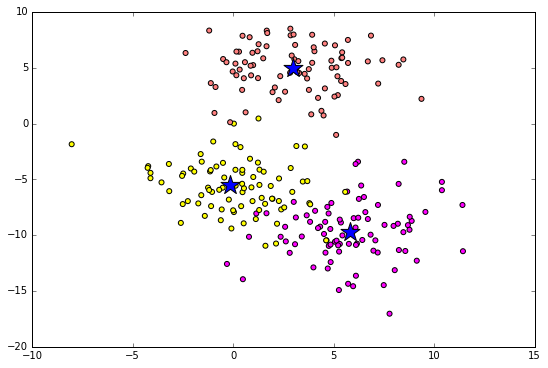

In [4]:
# superimpose cluster centers
fig = plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], s=25, c=y, cmap='spring')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='b', s=400)

As we can see from the graph, the k-Means algorithm does a decent job distinguishing the data with respect to their classes. We can see that clustering is similar to classification, in that each instance in the dataset is provided with a label by the algorithm, as dictated by the closest cluster in terms of Euclidean distance. However, since there is no ground truth (as this is an unsupervised model), the labels themselves have no a priori meaning.

### Clustering an image dataset

In this example we identify digits in an image dataset using k-Means clustering.

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()

# 1797 records of a 64-dimensional (flattened 8x8) feature space
print(digits.data.shape)

(1797, 64)


In [6]:
# instantiate a model with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=22)

# fit and predict model, store results of shape (1797,)
predicted_clusters = kmeans.fit_predict(digits.data)

# 10 cluster centers in 64 dimensions 
print(kmeans.cluster_centers_.shape)

(10, 64)


Since the cluster centers are points in a 64-dimensional feature space, they can be interpreted as the most common digit within the cluster.

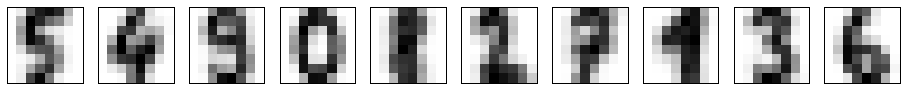

In [7]:
# reshape cluster centers to 8x8 array
centers = kmeans.cluster_centers_.reshape(-1, 8, 8)

# plot 10 cluster centers of the image dataset 
fig, axes = plt.subplots(1, 10, figsize=(16,8))

for ax, center in zip(axes.ravel(), centers):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap='binary')

In [8]:
# match each learned cluster label with the true labels found in them
from scipy.stats import mode

shape = predicted_clusters.shape
labels = np.zeros(shape)

for i in range(10):
    mask = (predicted_clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [9]:
# evaluate the accuracy of the algorithm with respect to true outputs
from sklearn.metrics import accuracy_score
print('Accuracy score: {:.3f}'.format(accuracy_score(digits.target, labels)))

Accuracy score: 0.792


As we can see, the k-Means model correctly grouped 80% of the dataset based on the relationship between predictor variables alone.

Text(0, 0.5, 'predicted label')

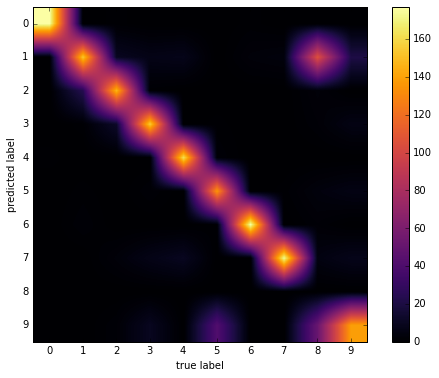

In [10]:
# plot a heat map to visualize the accuracy grid 
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
fig = plt.figure(figsize=(9, 6))
plt.imshow(mat.transpose(), cmap='inferno')
plt.colorbar()
plt.xticks(range(10)); plt.yticks(range(10))
plt.xlabel('true label'); plt.ylabel('predicted label')

From this figure we can see that the clusters closely resemble their true corresponding label, as indicated by the highlighted diagonal region of the confusion matrix. An interesting point to observe is the small volume of misclassification that occurs for the digit 8 on the x-axis; the model sometimes misinterpreted the digit as a 1. This is likely due to the fact that the digit 8 can sometimes resemble a 1 in its exterior form and structure (e.g., an 8 with narrow or skinny loops). This means that the clusters for these two labels are in close proximity to each other in this 64-dimensional space. 

### Clustering for color compression of images

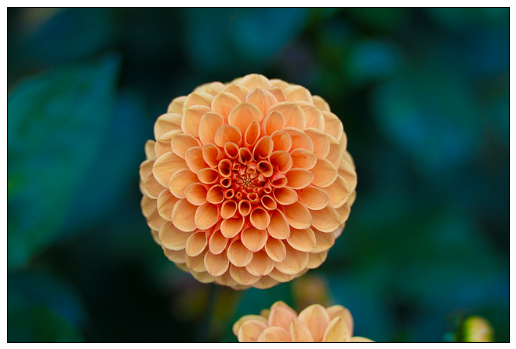

In [11]:
# load and plot a sample image
from sklearn.datasets import load_sample_image

flower = load_sample_image("flower.jpg")

fig = plt.figure(figsize=(9,6))
plt.xticks([]); plt.yticks([])
plt.imshow(flower)

In [12]:
# 427x640 image with 3 RGB channels
print(flower.shape)

(427, 640, 3)


In [13]:
# normalize and resize image to two-dimensions
data = flower / 255.0 
data = data.reshape(427*640, 3)
print(data.shape)

(273280, 3)


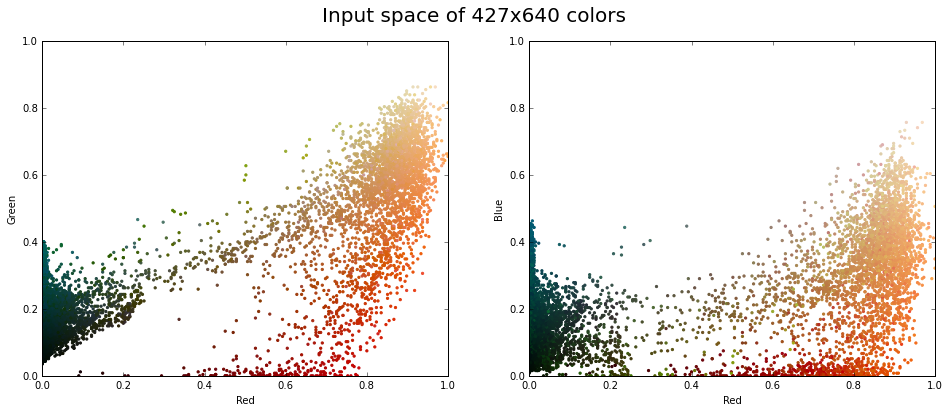

In [14]:
# create a function to visualize the pixels using a subset of the total pixel space
def plot_flower_pixels(data, title, colors=None, N=15000):
    if colors is None:
        colors = data
    # use a random permuted subset of up to N points
    rng = np.random.RandomState(22)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, fontsize=20);

plot_flower_pixels(data, title='Input space of 427x640 colors', colors=None)

We can reduce this large range of color values to a smaller one using k-Means clustering across the pixel-based feature space. The mini-batch implementation of the ordinary k-Means model allows for more efficient computation of large datasets like this one.

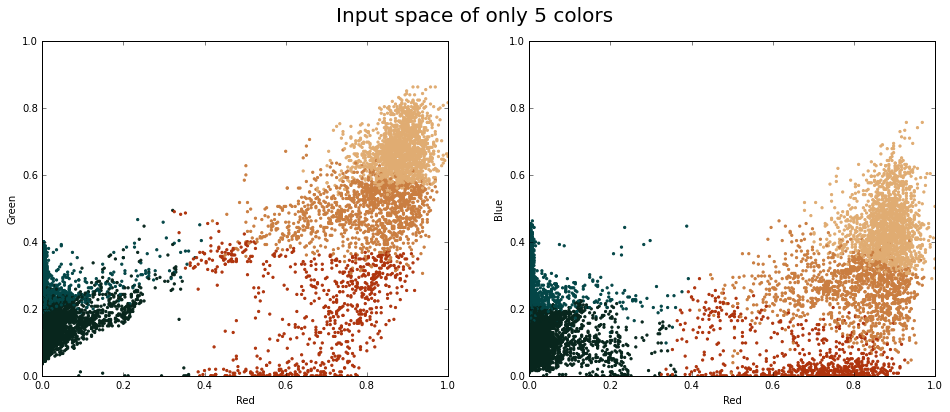

In [15]:
# use variant of k-Means that supports mini-batching
from sklearn.cluster import MiniBatchKMeans

# instantiate and fit model with 5 clusters
kmeans = MiniBatchKMeans(5).fit(data)

# create an array containing a new set of RGB values for each instance (i.e., pixel in the feature space)
reduced_colors = kmeans.cluster_centers_[kmeans.predict(data)]

# plot reduced feature space
plot_flower_pixels(data, title='Input space of only 5 colors', colors=reduced_colors)

Text(0.5, 1.0, 'Reduced Image')

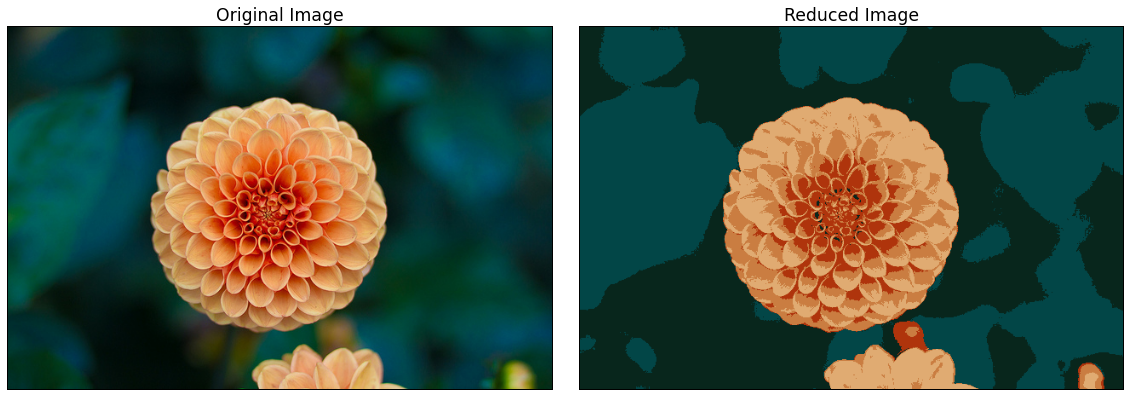

In [16]:
# plot a side-by-side comparison of the original and reduced image
flower_recolored = reduced_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'xticks':(), 'yticks':()}, gridspec_kw={'wspace':0.05})
ax[0].imshow(flower)
ax[0].set_title('Original Image', fontsize='xx-large')
ax[1].imshow(flower_recolored)
ax[1].set_title('Reduced Image', fontsize='xx-large')

We can see that the algorithm is able to retain quite a lot of information even with such a small number of colors (i.e., clusters). This illustrates the power of the k-Means algorithm even in cases where the data exists in a high-dimensional space, as is the case with images.